In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

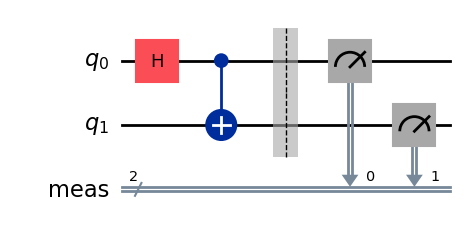

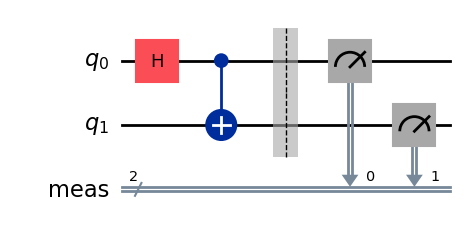

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(output='mpl');

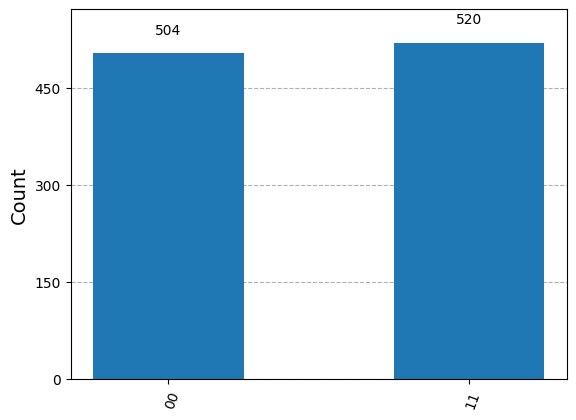

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts());

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [8]:
service = QiskitRuntimeService(channel='ibm_quantum', token='')

In [9]:
qcomp = service.least_busy(operational=True, simulator=False)

In [11]:
pm = generate_preset_pass_manager(backend=qcomp, optimization_level=1) # optimize the circuit for quantum execution
isa_circuit = pm.run(circuit) # modify circuit for qcomp's specific Instruction Set Architecture (ISA)
sampler = Sampler(qcomp)
job = sampler.run([isa_circuit])

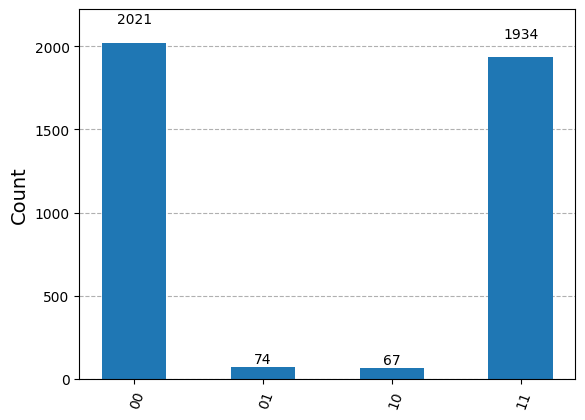

In [13]:

result = job.result()
plot_histogram(result[0].data.meas.get_counts());